# Weight Decay

:label:`sec_weight_decay`


Now that we have characterized the problem of overfitting,
we can introduce some standard techniques for regularizing models.
Recall that we can always mitigate overfitting
by going out and collecting more training data.
That can be costly, time consuming,
or entirely out of our control,
making it impossible in the short run.
For now, we can assume that we already have
as much high-quality data as our resources permit
and focus on regularization techniques.

Recall that in our
polynomial curve-fitting example
(:numref:`sec_model_selection`)
we could limit our model's capacity
simply by tweaking the degree 
of the fitted polynomial.
Indeed, limiting the number of features 
is a popular technique to avoid overfitting.
However, simply tossing aside features
can be too blunt an instrument for the job.
Sticking with the polynomial curve-fitting
example, consider what might happen
with high-dimensional inputs.
The natural extensions of polynomials
to multivariate data are called *monomials*, 
which are simply products of powers of variables.
The degree of a monomial is the sum of the powers.
For example, $x_1^2 x_2$, and $x_3 x_5^2$ 
are both monomials of degree $3$.

Note that the number of terms with degree $d$
blows up rapidly as $d$ grows larger.
Given $k$ variables, the number of monomials 
of degree $d$ is ${k - 1 + d} \choose {k - 1}$.
Even small changes in degree, say from $2$ to $3$,
dramatically increase the complexity of our model.
Thus we often need a more fine-grained tool
for adjusting function complexity.

## Squared Norm Regularization

*Weight decay* (commonly called *L2* regularization),
might be the most widely-used technique
for regularizing parametric machine learning models.
The technique is motivated by the basic intuition
that among all functions $f$,
the function $f = 0$ 
(assigning the value $0$ to all inputs) 
is in some sense the *simplest*,
and that we can measure the complexity 
of a function by its distance from zero.
But how precisely should we measure
the distance between a function and zero?
There is no single right answer.
In fact, entire branches of mathematics,
including parts of functional analysis 
and the theory of Banach spaces,
are devoted to answering this issue.

One simple interpretation might be 
to measure the complexity of a linear function
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
by some norm of its weight vector, e.g., $|| \mathbf{w} ||^2$.
The most common method for ensuring a small weight vector
is to add its norm as a penalty term
to the problem of minimizing the loss.
Thus we replace our original objective,
*minimize the prediction loss on the training labels*,
with new objective,
*minimize the sum of the prediction loss and the penalty term*.
Now, if our weight vector grows too large,
our learning algorithm might *focus* 
on minimizing the weight norm $|| \mathbf{w} ||^2$
versus minimizing the training error.
That is exactly what we want.
To illustrate things in code, 
let us revive our previous example
from :numref:`sec_linear_regression` for linear regression.
There, our loss was given by

$$l(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

Recall that $\mathbf{x}^{(i)}$ are the observations,
$y^{(i)}$ are labels, and $(\mathbf{w}, b)$
are the weight and bias parameters respectively.
To penalize the size of the weight vector,
we must somehow add $|| \mathbf{w} ||^2$ to the loss function,
but how should the model trade off the 
standard loss for this new additive penalty?
In practice, we characterize this tradeoff
via the *regularization constant* $\lambda > 0$, 
a non-negative hyperparameter 
that we fit using validation data:

$$l(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2.$$

For $\lambda = 0$, we recover our original loss function.
For $\lambda > 0$, we restrict the size of $|| \mathbf{w} ||$.
The astute reader might wonder why we work with the squared
norm and not the standard norm (i.e., the Euclidean distance).
We do this for computational convenience.
By squaring the L2 norm, we remove the square root, 
leaving the sum of squares of 
each component of the weight vector.
This makes the derivative of the penalty easy to compute
(the sum of derivatives equals the derivative of the sum).

Moreover, you might ask why we work with the L2 norm 
in the first place and not, say, the L1 norm.

In fact, other choices are valid and 
popular throughout statistics.
While L2-regularized linear models constitute
the classic *ridge regression* algorithm,
L1-regularized linear regression
is a similarly fundamental model in statistics
(popularly known as *lasso regression*).

More generally, the $\ell_2$ is just one 
among an infinite class of norms call p-norms,
many of which you might encounter in the future.
In general, for some number $p$, 
the $\ell_p$ norm is defined as

$$\|\mathbf{w}\|_p^p := \sum_{i=1}^d |w_i|^p.$$


One reason to work with the L2 norm
is that it places and outsize penalty
on large components of the weight vector.
This biases our learning algorithm 
towards models that distribute weight evenly 
across a larger number of features.
In practice, this might make them more robust
to measurement error in a single variable.
By contrast, L1 penalties lead to models
that concentrate weight on a small set of features,
which may be desirable for other reasons. 

The stochastic gradient descent updates 
for L2-regularized regression follow:

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),
\end{aligned}
$$

As before, we update $\mathbf{w}$ based on the amount 
by which our estimate differs from the observation.
However, we also shrink the size of $\mathbf{w}$ towards $0$.
That is why the method is sometimes called "weight decay":
given the penalty term alone,
our optimization algorithm *decays*
the weight at each step of training.
In contrast to feature selection,
weight decay offers us a continuous mechanism
for adjusting the complexity of $f$.
Small values of $\lambda$ correspond 
to unconstrained $\mathbf{w}$,
whereas large values of $\lambda$ 
constrain $\mathbf{w}$ considerably.
Whether we include a corresponding bias penalty $b^2$ 
can vary across implementations, 
and may vary across layers of a neural network.
Often, we do not regularize the bias term
of a network's output layer.
 

## High-Dimensional Linear Regression

We can illustrate the benefits of 
weight decay over feature selection
through a simple synthetic example.
First, we generate some data as before

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01).$$

choosing our label to be a linear function of our inputs,
corrupted by Gaussian noise with zero mean and variance 0.01.
To make the effects of overfitting pronounced,
we can increase the dimensionality of our problem to $d = 200$
and work with a small training set containing only 20 examples.

In [14]:
%mavenRepo snapshots https://oss.sonatype.org/content/repositories/snapshots/

%maven ai.djl:api:0.6.0-SNAPSHOT
%maven org.slf4j:slf4j-api:1.7.26
%maven org.slf4j:slf4j-simple:1.7.26
%maven net.java.dev.jna:jna:5.3.0
%maven ai.djl.mxnet:mxnet-engine:0.6.0-SNAPSHOT
%maven ai.djl.mxnet:mxnet-native-auto:1.7.0-a

In [15]:
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-jsplot</artifactId>
    <version>0.30.4</version>
</dependency>

In [16]:
%load ../utils/plot-utils.ipynb
%load ../utils/DataPoints.java
%load ../utils/Training.java

In [17]:
import java.nio.file.*;

import ai.djl.*;
import ai.djl.engine.*;
import ai.djl.ndarray.*;
import ai.djl.training.*;
import ai.djl.nn.*;
import ai.djl.ndarray.types.*;
import ai.djl.training.*;
import ai.djl.training.dataset.*;
import ai.djl.training.initializer.*;
import ai.djl.training.loss.*;
import ai.djl.training.listener.*;
import ai.djl.training.evaluator.*;
import ai.djl.training.optimizer.*;
import ai.djl.training.util.*;
import tech.tablesaw.api.*;
import tech.tablesaw.plotly.api.*;
import tech.tablesaw.plotly.components.*;
import tech.tablesaw.plotly.Plot;
import tech.tablesaw.plotly.components.Figure;

In [23]:
import ai.djl.ndarray.types.*;

int n_train = 20;
int n_test = 100;
int num_inputs = 200;
int batch_size = 5;

float true_b = 0.05f;
NDManager manager = NDManager.newBaseManager();
NDArray true_w = manager.ones(new Shape(num_inputs, 1));
true_w = true_w.mul(0.01);

public ArrayDataset loadArray(NDArray features, NDArray labels, int batchSize, boolean shuffle) {
    return new ArrayDataset.Builder()
                  .setData(features) // set the features
                  .optLabels(labels) // set the labels
                  .setSampling(batchSize, shuffle) // set the batch size and random sampling
                  .build();
}

DataPoints train_data = DataPoints.syntheticData(manager, true_w, true_b, n_train);

ArrayDataset train_iter = loadArray(train_data.getX(), train_data.getY(), batch_size, true);

DataPoints test_data = DataPoints.syntheticData(manager, true_w, true_b, n_test);

ArrayDataset test_iter = loadArray(test_data.getX(), test_data.getY(), batch_size, false);

train_data.getY();

ND: (20, 1) cpu() float32
[[-0.087 ],
 [ 0.0704],
 [-0.2359],
 [-0.0579],
 [ 0.1659],
 [-0.1577],
 [-0.187 ],
 [ 0.1433],
 [-0.0085],
 [-0.0676],
 ... 10 more]


## Implementation from Scratch

Next, we will implement weight decay from scratch,
simply by adding the squared $\ell_2$ penalty
to the original target function.

### Initializing Model Parameters

First, we will define a function 
to randomly initialize our model parameters 
and run `attach_grad` on each to allocate 
memory for the gradients we will calculate.

In [82]:
public class InitParams{

    private NDArray w;
    private NDArray b;
    private NDList l;
    
    public NDArray getW(){
        return this.w;
    }
    
    public NDArray getB(){
        return this.b;
    }
    
    public InitParams(){
        NDManager manager = NDManager.newBaseManager();
        w = manager.randomNormal(0, 1.0f, new Shape(num_inputs, 1), DataType.FLOAT32, Device.defaultDevice());
        b = manager.zeros(new Shape(1));
    }

}

### Defining $\ell_2$ Norm Penalty

Perhaps the most convenient way to implement this penalty
is to square all terms in place and sum them up.
We divide by $2$ by convention
(when we take the derivative of a quadratic function,
the $2$ and $1/2$ cancel out, ensuring that the expression
for the update looks nice and simple).

In [111]:
public NDArray l2Penalty(NDArray w){
    return ((w.pow(2)).sum()).div(2);
}

In [112]:
import ai.djl.training.*;
import ai.djl.training.optimizer.Optimizer;
import ai.djl.training.optimizer.learningrate.*;
import ai.djl.training.evaluator.*;
import ai.djl.training.listener.TrainingListener.*;
import ai.djl.nn.core.*;

In [113]:
Loss l2loss = Loss.l2Loss();

### Defining the Train and Test Functions

The following code fits a model on the training set
and evaluates it on the test set.
The linear network and the squared loss
have not changed since the previous chapter,
so we will just import them via `d2l.linreg` and `d2l.squared_loss`.
The only change here is that our loss now includes the penalty term.

In [123]:
public void train(float lambd){
    
    InitParams initParams = new InitParams();
    
    NDList params = new NDList(initParams.getW(), initParams.getB());
    
    NDArray loss;
    int num_epochs = 100;
    float lr = 0.003f;
    
    LearningRateTracker lrt = LearningRateTracker.fixedLearningRate(lr);
    Optimizer sgd = Optimizer.sgd().setLearningRateTracker(lrt).build();
    
    DefaultTrainingConfig config = new DefaultTrainingConfig(l2loss)
    .optOptimizer(sgd) // Optimizer (loss function)
    .addEvaluator(new Accuracy()) // Model Accuracy
    .addTrainingListeners(TrainingListener.Defaults.logging()); // Logging
    
    Model model = Model.newInstance("lin-reg");

    SequentialBlock net = new SequentialBlock();
    Linear linearBlock = Linear.builder().optBias(true).setOutChannels(1).build();
    net.add(linearBlock);

    model.setBlock(net);
    
    Trainer trainer = model.newTrainer(config);
    trainer.initialize(new Shape(batch_size, 2));
    for(int epoch = 1; epoch <= num_epochs; epoch++){
        
        for(Batch batch : trainer.iterateDataset(train_iter)){
            
            NDArray X = batch.getData().head();
            NDArray y = batch.getLabels().head();
            
            // Attach Gradients
            for (NDArray param : params) {
                param.attachGradient();
            }
            NDArray w = params.get(0);
            NDArray b = params.get(1);
            
            try (GradientCollector gc = Engine.getInstance().newGradientCollector()) {
            // Minibatch loss in X and y
                NDArray l = Training.squaredLoss(Training.linreg(X, w, b), y).add(l2Penalty(w).mul(lambd));
                gc.backward(l);  // Compute gradient on l with respect to w and b
                Training.sgd(params, lr, batch_size);  // Update parameters using their gradient
            }
            
            batch.close();
        }
    }
    
    System.out.println("l1 norm of w: " + params.get(0).abs().sum());
}

### Training without Regularization

We now run this code with `lambd = 0`, 
disabling weight decay.
Note that we overfit badly, 
decreasing the training error but not the 
test error---a textook case of overfitting.

In [121]:
train(0f)

[IJava-executor-16] INFO ai.djl.training.listener.LoggingTrainingListener - Training on: cpu().
[IJava-executor-16] INFO ai.djl.training.listener.LoggingTrainingListener - Load MXNet Engine Version 1.7.0 in 0.016 ms.
[Finalizer] WARN ai.djl.BaseModel - Model was not closed explicitly.


l1 norm of w: ND: () cpu() float32
139.5819



### Using Weight Decay

Below, we run with substantial weight decay.
Note that the training error increases
but the test error decreases.
This is precisely the effect 
we expect from regularization.
As an exercise, you might want to check
that the $\ell_2$ norm of the weights $\mathbf{w}$
has actually decreased.

In [122]:
train(3f)

[IJava-executor-16] INFO ai.djl.training.listener.LoggingTrainingListener - Training on: cpu().
[IJava-executor-16] INFO ai.djl.training.listener.LoggingTrainingListener - Load MXNet Engine Version 1.7.0 in 0.015 ms.
[Finalizer] WARN ai.djl.BaseModel - Model was not closed explicitly.


l1 norm of w: ND: () cpu() float32
3.9482



## Concise Implementation

Because weight decay is ubiquitous 
in neural network optimization,
Gluon makes it especially convenient,
integrating weight decay into the optimization algorithm itself
for easy use in combination with any loss function.
Moreover, this integration serves a computational benefit,
allowing implementation tricks to add weight decay to the algorithm,
without any additional computational overhead.
Since the weight decay portion of the update
depends only on the current value of each parameter,
and the optimizer must touch each parameter once anyway.

In the following code, we specify
the weight decay hyperparameter directly
through `wd` when instantiating our `Trainer`.
By default, Gluon decays both 
weights and biases simultaneously.
Note that the hyperparameter `wd` 
will be multiplied by `wd_mult`
when updating model parameters. 
Thus, if we set `wd_mult` to $0$,
the bias parameter $b$ will not decay.

In [7]:
def train_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    loss = gluon.loss.L2Loss()
    num_epochs, lr = 100, 0.003
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': lr, 'wd': wd})
    # The bias parameter has not decayed. Bias names generally end with "bias"
    net.collect_params('.*bias').setattr('wd_mult', 0)
    
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], legend=['train', 'test'])
    for epoch in range(1, num_epochs+1):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        if epoch % 5 == 0:
            animator.add(epoch, (d2l.evaluate_loss(net, train_iter, loss),
                                 d2l.evaluate_loss(net, test_iter, loss)))
    print('L1 norm of w:', np.abs(net[0].weight.data()).sum())

The plots look identical to those when 
we implemented weight decay from scratch.
However, they run appreciably faster 
and are easier to implement,
a benefit that will become more
pronounced for large problems.

L1 norm of w: 163.57935


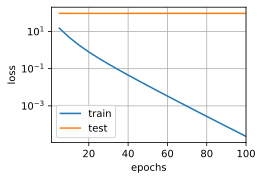

In [8]:
train_gluon(0)

L1 norm of w: 3.8907561


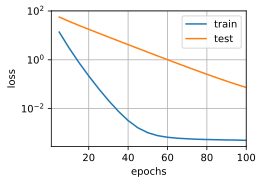

In [9]:
train_gluon(3)

So far, we only touched upon one notion of
what constitutes a simple *linear* function.
Moreover, what constitutes a simple *nonlinear* function
can be an even more complex question.
For instance, [Reproducing Kernel Hilbert Spaces (RKHS)](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
allows one to apply tools introduced 
for linear functions in a nonlinear context.
Unfortunately, RKHS-based algorithms
tend to scale purely to large, high-dimensional data.
In this book we will default to the simple heuristic
of applying weight decay on all layers of a deep network.

## Summary

* Regularization is a common method for dealing with overfitting. It adds a penalty term to the loss function on the training set to reduce the complexity of the learned model.
* One particular choice for keeping the model simple is weight decay using an $\ell_2$ penalty. This leads to weight decay in the update steps of the learning algorithm.
* Gluon provides automatic weight decay functionality in the optimizer by setting the hyperparameter `wd`.
* You can have different optimizers within the same training loop, e.g., for different sets of parameters.


## Exercises

1. Experiment with the value of $\lambda$ in the estimation problem in this page. Plot training and test accuracy as a function of $\lambda$. What do you observe?
1. Use a validation set to find the optimal value of $\lambda$. Is it really the optimal value? Does this matter?
1. What would the update equations look like if instead of $\|\mathbf{w}\|^2$ we used $\sum_i |w_i|$ as our penalty of choice (this is called $\ell_1$ regularization).
1. We know that $\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$. Can you find a similar equation for matrices (mathematicians call this the [Frobenius norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm))?
1. Review the relationship between training error and generalization error. In addition to weight decay, increased training, and the use of a model of suitable complexity, what other ways can you think of to deal with overfitting?
1. In Bayesian statistics we use the product of prior and likelihood to arrive at a posterior via $P(w \mid x) \propto P(x \mid w) P(w)$. How can you identify $P(w)$ with regularization?

## [Discussions](https://discuss.mxnet.io/t/2342)

![](../img/qr_weight-decay.svg)